In [10]:
import os
import polars as pl
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# importing the oj dataset
os.chdir('/Users/noaht/OneDrive/Desktop/ECON_487')
data_oj = pl.read_csv('oj.csv')

# Basic Data Exploration

In [ ]:
# polars dataframe of the data with mean and variance
plot_data = (
    data_oj
    .group_by(["brand", "week"])
    .agg(
        pl.col("price").mean().alias("avg_price"),
        pl.col("price").var().alias("var_price")
    )
    .sort(["brand", "week"])
)

[Text(0.5, 0, 'Week'),
 Text(0, 0.5, 'Average Price'),
 Text(0.5, 1.0, 'Average Price of OJ by Brand over Time')]

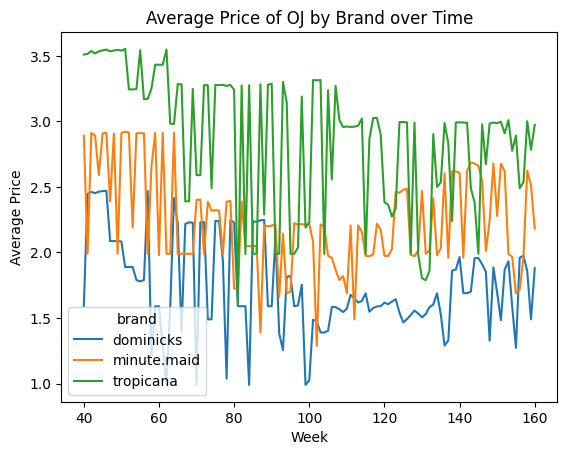

In [12]:
# lineplot of how the mean price changes over time
price_graph = sns.lineplot(
    data = plot_data, 
    x = "week",
    y = "avg_price",
    # color each brand separately 
    hue = "brand"
)

# graph labels
price_graph.set(
    xlabel = "Week",
    ylabel = "Average Price",
    title = "Average Price of OJ by Brand over Time"
)

There seems to be a clear correlation between brand and average price. Tropicana appears to be the most expensive on average, Minute Maid seems to be the middle brand, and Dominicks seems to be the cheapest. 

In [13]:
# summary of the data

# adding log(price) column
data_oj = (
    data_oj
    .with_columns(pl.col('price').log().alias('log_price'))
)

model = smf.ols('logmove ~ log_price', data = data_oj).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                logmove   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     7608.
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        16:37:31   Log-Likelihood:                -38251.
No. Observations:               28947   AIC:                         7.651e+04
Df Residuals:                   28945   BIC:                         7.652e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4234      0.015    679.043      0.0

basic model: it looks like as the log price increases, log quantity falls, which is what we expect